In [680]:
import json
import os
import sqlite3
import datetime

import country_converter as coco
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from sqlite3 import Error
from statistics import mean

db_name = '/Users/alexraudvee/Downloads/tweets_final.db'
convs_path = '/Users/alexraudvee/Downloads/updated_convs.json'

# path to the jsons with easyjet tweets and british airways tweets
easyjet_path = '/Users/alexraudvee/Downloads/easyjet_tweets.json'
british_path = '/Users/alexraudvee/Downloads/britishairways_tweets.json'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



In [544]:
countries ={'AW': 'ABW',
 'AF': 'AFG',
 'AO': 'AGO',
 'AI': 'AIA',
 'AX': 'ALA',
 'AL': 'ALB',
 'AD': 'AND',
 'AE': 'ARE',
 'AR': 'ARG',
 'AM': 'ARM',
 'AS': 'ASM',
 'AQ': 'ATA',
 'TF': 'ATF',
 'AG': 'ATG',
 'AU': 'AUS',
 'AT': 'AUT',
 'AZ': 'AZE',
 'BI': 'BDI',
 'BE': 'BEL',
 'BJ': 'BEN',
 'BQ': 'BES',
 'BF': 'BFA',
 'BD': 'BGD',
 'BG': 'BGR',
 'BH': 'BHR',
 'BS': 'BHS',
 'BA': 'BIH',
 'BL': 'BLM',
 'BY': 'BLR',
 'BZ': 'BLZ',
 'BM': 'BMU',
 'BO': 'BOL',
 'BR': 'BRA',
 'BB': 'BRB',
 'BN': 'BRN',
 'BT': 'BTN',
 'BV': 'BVT',
 'BW': 'BWA',
 'CF': 'CAF',
 'CA': 'CAN',
 'CC': 'CCK',
 'CH': 'CHE',
 'CL': 'CHL',
 'CN': 'CHN',
 'CI': 'CIV',
 'CM': 'CMR',
 'CD': 'COD',
 'CG': 'COG',
 'CK': 'COK',
 'CO': 'COL',
 'KM': 'COM',
 'CV': 'CPV',
 'CR': 'CRI',
 'CU': 'CUB',
 'CW': 'CUW',
 'CX': 'CXR',
 'KY': 'CYM',
 'CY': 'CYP',
 'CZ': 'CZE',
 'DE': 'DEU',
 'DJ': 'DJI',
 'DM': 'DMA',
 'DK': 'DNK',
 'DO': 'DOM',
 'DZ': 'DZA',
 'EC': 'ECU',
 'EG': 'EGY',
 'ER': 'ERI',
 'EH': 'ESH',
 'ES': 'ESP',
 'EE': 'EST',
 'ET': 'ETH',
 'FI': 'FIN',
 'FJ': 'FJI',
 'FK': 'FLK',
 'FR': 'FRA',
 'FO': 'FRO',
 'FM': 'FSM',
 'GA': 'GAB',
 'GB': 'GBR',
 'GE': 'GEO',
 'GG': 'GGY',
 'GH': 'GHA',
 'GI': 'GIB',
 'GN': 'GIN',
 'GP': 'GLP',
 'GM': 'GMB',
 'GW': 'GNB',
 'GQ': 'GNQ',
 'GR': 'GRC',
 'GD': 'GRD',
 'GL': 'GRL',
 'GT': 'GTM',
 'GF': 'GUF',
 'GU': 'GUM',
 'GY': 'GUY',
 'HK': 'HKG',
 'HM': 'HMD',
 'HN': 'HND',
 'HR': 'HRV',
 'HT': 'HTI',
 'HU': 'HUN',
 'ID': 'IDN',
 'IM': 'IMN',
 'IN': 'IND',
 'IO': 'IOT',
 'IE': 'IRL',
 'IR': 'IRN',
 'IQ': 'IRQ',
 'IS': 'ISL',
 'IL': 'ISR',
 'IT': 'ITA',
 'JM': 'JAM',
 'JE': 'JEY',
 'JO': 'JOR',
 'JP': 'JPN',
 'KZ': 'KAZ',
 'KE': 'KEN',
 'KG': 'KGZ',
 'KH': 'KHM',
 'KI': 'KIR',
 'KN': 'KNA',
 'KR': 'KOR',
 'KW': 'KWT',
 'LA': 'LAO',
 'LB': 'LBN',
 'LR': 'LBR',
 'LY': 'LBY',
 'LC': 'LCA',
 'LI': 'LIE',
 'LK': 'LKA',
 'LS': 'LSO',
 'LT': 'LTU',
 'LU': 'LUX',
 'LV': 'LVA',
 'MO': 'MAC',
 'MF': 'MAF',
 'MA': 'MAR',
 'MC': 'MCO',
 'MD': 'MDA',
 'MG': 'MDG',
 'MV': 'MDV',
 'MX': 'MEX',
 'MH': 'MHL',
 'MK': 'MKD',
 'ML': 'MLI',
 'MT': 'MLT',
 'MM': 'MMR',
 'ME': 'MNE',
 'MN': 'MNG',
 'MP': 'MNP',
 'MZ': 'MOZ',
 'MR': 'MRT',
 'MS': 'MSR',
 'MQ': 'MTQ',
 'MU': 'MUS',
 'MW': 'MWI',
 'MY': 'MYS',
 'YT': 'MYT',
 'NA': 'NAM',
 'NC': 'NCL',
 'NE': 'NER',
 'NF': 'NFK',
 'NG': 'NGA',
 'NI': 'NIC',
 'NU': 'NIU',
 'NL': 'NLD',
 'NO': 'NOR',
 'NP': 'NPL',
 'NR': 'NRU',
 'NZ': 'NZL',
 'OM': 'OMN',
 'PK': 'PAK',
 'PA': 'PAN',
 'PN': 'PCN',
 'PE': 'PER',
 'PH': 'PHL',
 'PW': 'PLW',
 'PG': 'PNG',
 'PL': 'POL',
 'PR': 'PRI',
 'KP': 'PRK',
 'PT': 'PRT',
 'PY': 'PRY',
 'PS': 'PSE',
 'PF': 'PYF',
 'QA': 'QAT',
 'RE': 'REU',
 'RO': 'ROU',
 'RU': 'RUS',
 'RW': 'RWA',
 'SA': 'SAU',
 'SD': 'SDN',
 'SN': 'SEN',
 'SG': 'SGP',
 'GS': 'SGS',
 'SH': 'SHN',
 'SJ': 'SJM',
 'SB': 'SLB',
 'SL': 'SLE',
 'SV': 'SLV',
 'SM': 'SMR',
 'SO': 'SOM',
 'PM': 'SPM',
 'RS': 'SRB',
 'SS': 'SSD',
 'ST': 'STP',
 'SR': 'SUR',
 'SK': 'SVK',
 'SI': 'SVN',
 'SE': 'SWE',
 'SZ': 'SWZ',
 'SX': 'SXM',
 'SC': 'SYC',
 'SY': 'SYR',
 'TC': 'TCA',
 'TD': 'TCD',
 'TG': 'TGO',
 'TH': 'THA',
 'TJ': 'TJK',
 'TK': 'TKL',
 'TM': 'TKM',
 'TL': 'TLS',
 'TO': 'TON',
 'TT': 'TTO',
 'TN': 'TUN',
 'TR': 'TUR',
 'TV': 'TUV',
 'TW': 'TWN',
 'TZ': 'TZA',
 'UG': 'UGA',
 'UA': 'UKR',
 'UM': 'UMI',
 'UY': 'URY',
 'US': 'USA',
 'UZ': 'UZB',
 'VA': 'VAT',
 'VC': 'VCT',
 'VE': 'VEN',
 'VG': 'VGB',
 'VI': 'VIR',
 'VN': 'VNM',
 'VU': 'VUT',
 'WF': 'WLF',
 'WS': 'WSM',
 'YE': 'YEM',
 'ZA': 'ZAF',
 'ZM': 'ZMB',
 'ZW': 'ZWE'}

avia_companies = {'KLM': 56377143, 'AirFrance': 106062176, 'British_Airways': 18332190, 'AmericanAir': 22536055,
                  'Lufthansa': 124476322, 'AirBerlin': 26223583,
                  'AirBerlin assist': 2182373406, 'easyJet': 38676903, 'RyanAir': 1542862735, 'SingaporeAir': 253340062,
                  'Qantas': 218730857, 'EtihadAirways': 45621423,
                  'VirginAtlantic': 20626359}

exclude_list = avia_companies.values()

In [698]:
# functions that we are going to use

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    return conn


def convert(label):
    ddict = {'negative':-1, 'neutral':0, 'positive':1}
    return ddict[label]


def get_margin(a3, df):
    try:
        margin = df[df['alpha_3'] == a3]['tweet_id'].values[0]
    except:
        margin = 0

    return margin



In [699]:
# create connection with the database 
conn = create_connection(db_name)

2.6.0


In [700]:
query1 = """
    SELECT tweet_geo_id AS tweet_id, country_code
    FROM tweets_geo
"""

tweet_geo_df = pd.read_sql_query(query1, conn)

In [701]:
# convert jsons to the dataframes 
df_for_easyjet = pd.read_json(easyjet_path)
df_for_britishairways = pd.read_json(british_path)

In [702]:
df_for_britishairways.drop(['timestamp_ms', 'text', 'sentiment_numeric', 'timestamp_int', 'text_clean_len', 'till_hour_str', 'day_of_year', 'till_minute_str'], axis=1, inplace=True)
df_for_easyjet.drop(['timestamp_ms', 'text', 'sentiment_numeric', 'timestamp_int', 'text_clean_len', 'till_hour_str', 'day_of_year', 'till_minute_str'], axis=1, inplace=True)

In [703]:
df_for_easyjet = pd.merge(df_for_easyjet, tweet_geo_df, on='tweet_id')
df_for_britishairways = pd.merge(df_for_britishairways, tweet_geo_df, on='tweet_id')

## Easyjet on the map

In [704]:
# take only negatives 
df_for_easyjet_neg = df_for_easyjet[df_for_easyjet['sentiment_label'] == 'negative']

# take only needed info from the dataframe for the plot 
df_neg_geo_ej = df_for_easyjet_neg[(df_for_easyjet_neg['sentiment_label'] == 'negative') ] 
df_neg_geo_ej.user_id.mask(df_neg_geo_ej.tweet_id.isin(exclude_list),inplace=True)

# group by country code with counted number of negatives tweets
df_neg_geo_ej = df_neg_geo_ej.groupby('country_code').count()[['tweet_id']].reset_index().drop(0)

# eluminate the row with XK because it is not in pandas anymore
df_neg_geo_ej = df_neg_geo_ej[df_neg_geo_ej.country_code != 'XK']

# add the alpha3 instead of the code 
df_neg_geo_ej['alpha_3'] = df_neg_geo_ej['country_code'].apply(lambda x: countries[x])

# df_neg_geo = df_neg_geo[df_neg_geo['tweet_id'] > 20]

# add all them in the world dataframe 
world['margin'] = world['iso_a3'].apply(lambda row: get_margin(row, df_neg_geo_ej))


In [705]:
world[world['margin'] != 0]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,margin
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",14
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",68
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",1
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",1
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",1
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",1
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",2
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",4
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...",1
44,16290913,South America,Ecuador,ECU,182400.0,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...",1


/Users/alexraudvee/opt/anaconda3/envs/personal_use/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


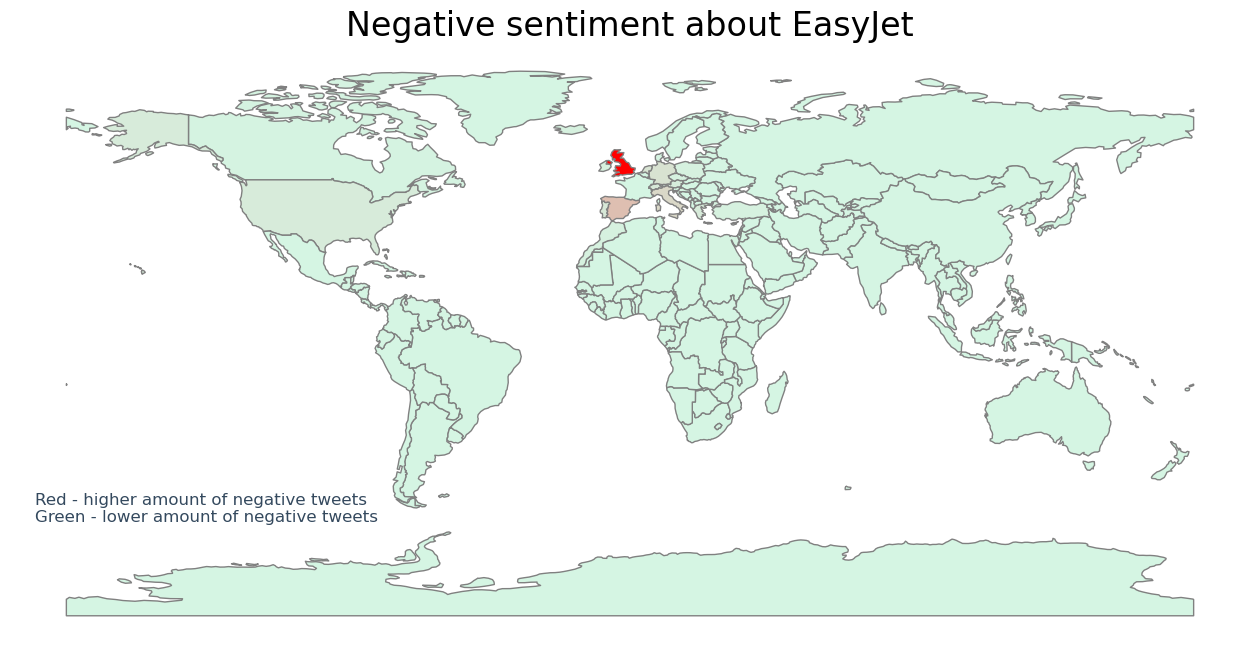

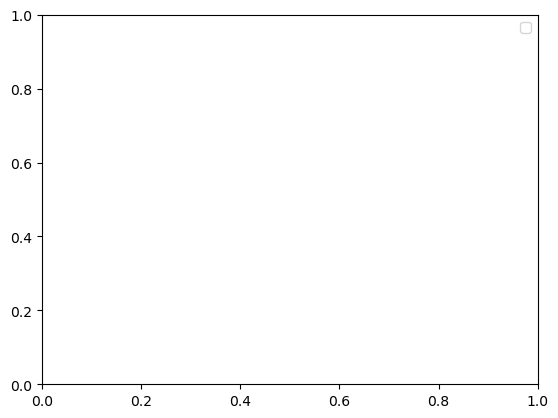

In [708]:
# create new color map 
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',['#D5F5E3', 'red', 'red'], N=256)

ax2 = world.plot(column='margin',  figsize=(16,16), edgecolor=u'gray', cmap=cmap)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.text(x=-190, y=-60, s="""Red - higher amount of negative tweets \nGreen - lower amount of negative tweets""", c='#34495E', size=12)
plt.axis(False)
plt.title('Negative sentiment about EasyJet', size=24)
plt.show()
plt.legend(['negative', ])

## BritishAirways on the map

In [709]:
# take only negatives 
df_for_britishairways_neg = df_for_britishairways[df_for_britishairways['sentiment_label'] == 'negative']

# take only needed info from the dataframe for the plot 
df_neg_geo_ba = df_for_britishairways_neg[(df_for_britishairways_neg['sentiment_label'] == 'negative') ] 
df_neg_geo_ba.user_id.mask(df_neg_geo_ba.tweet_id.isin(exclude_list),inplace=True)

# group by country code with counted number of negatives tweets
df_neg_geo_ba = df_neg_geo_ba.groupby('country_code').count()[['tweet_id']].reset_index().drop(0)

# eluminate the row with XK because it is not in pandas anymore
df_neg_geo_ba = df_neg_geo_ba[df_neg_geo_ba.country_code != 'XK']

# add the alpha3 instead of the code 
df_neg_geo_ba['alpha_3'] = df_neg_geo_ba['country_code'].apply(lambda x: countries[x])

# df_neg_geo = df_neg_geo[df_neg_geo['tweet_id'] > 20]

# add all them in the world dataframe 
world['margin'] = world['iso_a3'].apply(lambda row: get_margin(row, df_neg_geo_ba))

/Users/alexraudvee/opt/anaconda3/envs/personal_use/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


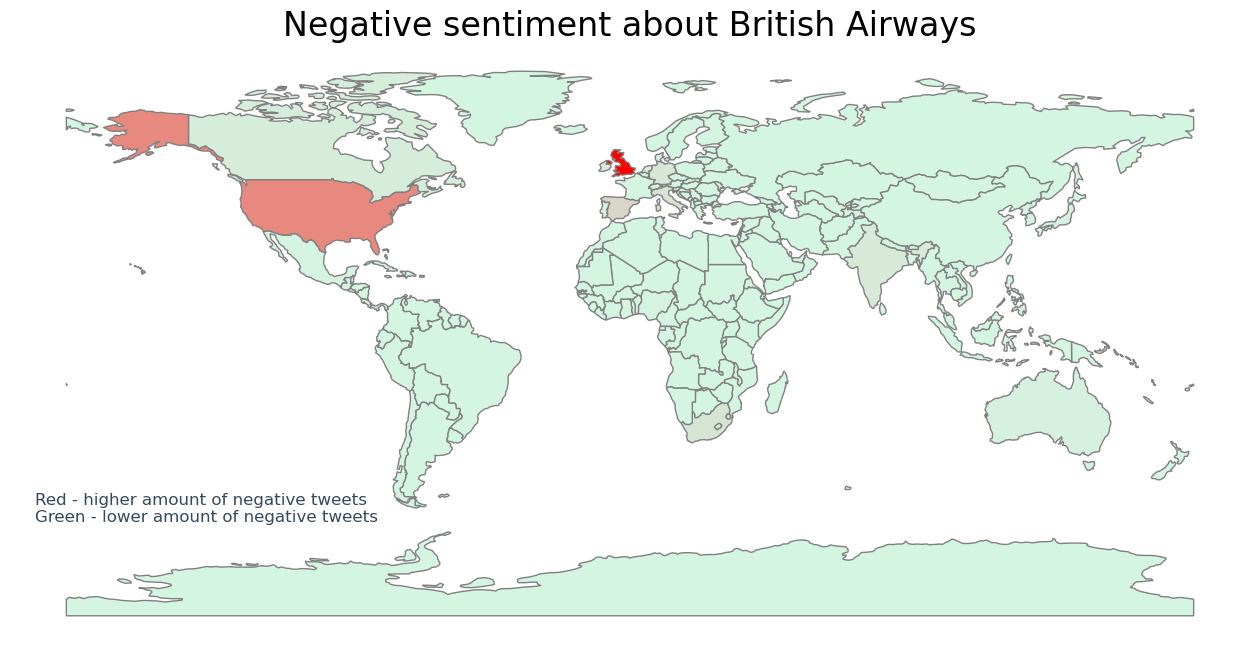

In [710]:
# create new color map 
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',['#D5F5E3', 'red', 'red'], N=256)

ax2 = world.plot(column='margin',  figsize=(16,16), edgecolor=u'gray', cmap=cmap)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.text(x=-190, y=-60, s="""Red - higher amount of negative tweets \nGreen - lower amount of negative tweets""", c='#34495E', size=12)
plt.axis(False)
plt.title('Negative sentiment about British Airways', size=24)
plt.show()

# Further analysis

In [737]:
# get the top 5 countries with highest negative tweets as the list of country codes 
df_further_exploration_easy = df_neg_geo_ej.sort_values(by='tweet_id', ascending=False).head(5)
df_further_exploration_british = df_neg_geo_ba.sort_values(by='tweet_id', ascending=False).head(5)
top_country_with_negs = df_further_exploration_easy.country_code.to_frame().reset_index()
top_country_with_negs

,index,country_code
0,22,GB
1,19,ES
2,21,FR
3,34,IT
4,13,DE


Text(0, 0.5, 'Tweets Count')

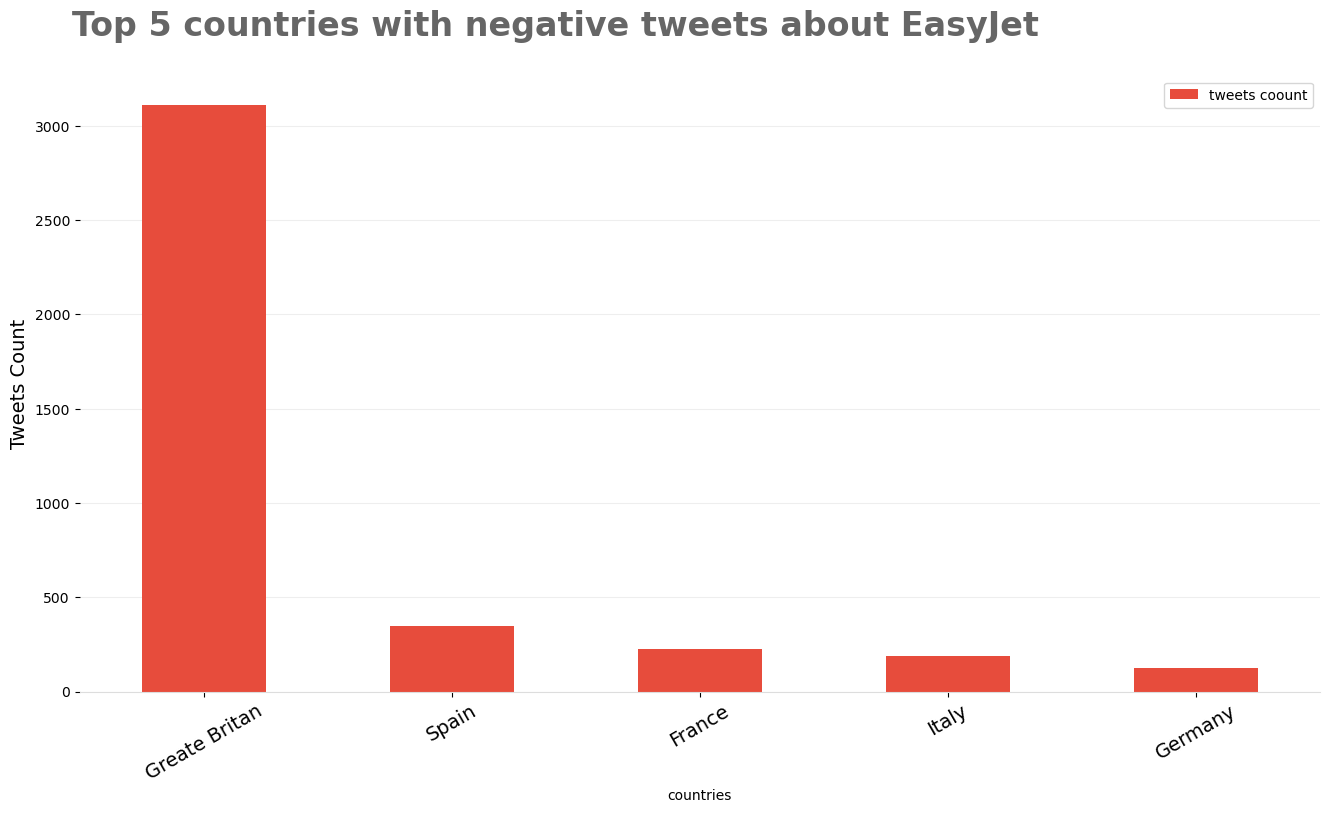

In [736]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))

df_further_exploration_plt_easy = df_further_exploration_easy[['country_code', 'tweet_id']].set_index('country_code')
# plot
df_further_exploration_plt_easy.plot(kind='bar', ax=ax, color=['#E74C3C'])

# title
ax.text(x=0.12, y=.93, s="Top 5 countries with negative tweets about EasyJet", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

#legend 
ax.legend(['tweets coount'])

# x axis 
ax.set_xlabel('countries')
ax.set_xticks(ticks=[0,1,2,3,4], labels=['Greate Britan', 'Spain', 'France', 'Italy', 'Germany'], rotation=30, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

Text(0, 0.5, 'Tweets Count')

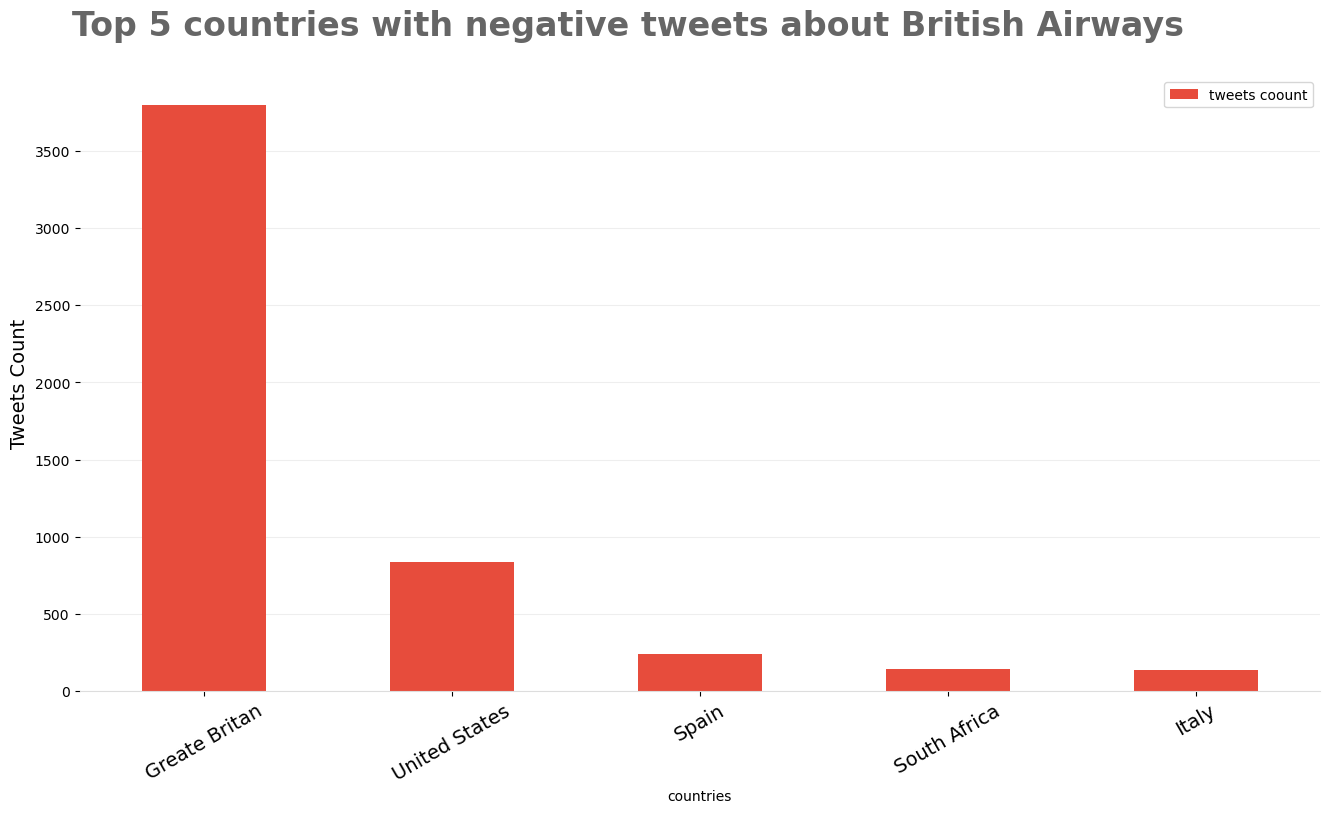

In [740]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))

df_further_exploration_plt_british = df_further_exploration_british[['country_code', 'tweet_id']].set_index('country_code')
# plot
df_further_exploration_plt_british.plot(kind='bar', ax=ax, color=['#E74C3C'])

# title
ax.text(x=0.12, y=.93, s="Top 5 countries with negative tweets about British Airways", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

#legend 
ax.legend(['tweets coount'])

# x axis 
ax.set_xlabel('countries')
ax.set_xticks(ticks=[0,1,2,3,4], labels=['Greate Britan', 'United States', 'Spain', 'South Africa', 'Italy'], rotation=30, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

In [558]:
df_for_easyjet = pd.merge(df_for_easyjet, top_country_with_negs, on='country_code')
df_for_britishairways = pd.merge(df_for_britishairways, top_country_with_negs, on='country_code')

df_for_easyjet = pd.merge(df_for_easyjet, top_country_with_negs, on='country_code')
df_for_britishairways = pd.merge(df_for_britishairways, top_country_with_negs, on='country_code')

In [559]:
# create the lists with information by which we are going to extract about which topic is it

comforts = ['seat', 'legroom', 'hotel', 'greed', 'outpricing', 'charged', 'updates', 'website', 'flight experience', 'full price ticket', 'entertainment']
luggages = ['bad', 'luggage', 'baggage', 'handbag', 'belonging', 'suitcase', 'belongings']
punctualitys = ['hour', 'day', 'late', 'waiting', 'delay', 'week', 'home', 'today', 'year', 'tomorrow', 'month', 'morning', 'date', 'night', 'minute', 'queue', 'cancel', 'cancelation', 'flight hour', 'flight tomorrow', 'filght day', 'flight  delay', 'date flight', 'hour delay', 'date flight', 'hour flight', 'return flight', 'flight home', 'flight today', 'week airline', 'flight delay', 'flight week', 'hold hour', 'day flight', 'today flight', 'time flight']
compensations = ['refund', 'money', 'time', 'compensation', 'hold', 'response', 'ticket', 'bill', 'price', 'return', 'refund flight', 'flight refund', 'refund option', 'refund week', 'website refund', 'passenger money', 'tiket fly', 'companion ticket', 'option passenger', 'passenger flight', 'compensation law', 'flight compensation', 'option refund']
customer_service = ['customer', 'service', 'payout', 'phone', 'help', 'someone', 'nothing', 'call', 'fleet', 'board', 'crew', 'ground', 'customer service', 'call centre', 'staff', 'support', 'airline website', 'phone line', 'ground fleet', 'manage booking']
foods = ['food', 'drink', 'snack']
flight_experiences = ['plane', 'flight', 'refund', 'hour', 'staff', 'money', 'support', 'customer', 'back', 'time', 'day', 'plane', 'delay', 'week', 'seat', 'option', 'need', 'compensation', 'company', 'baliouts', 'food', 'help', 'website', 'bag', 'travel', 'bood', 'luggage', 'booking', 'response', 'crew', 'people', 'passanger', 'cancellation', 'cancelation']

In [560]:
# function for finding the topics in the tweet 

def define_topic(text: str):

    text = text.lower() # convert to lower case 

    if any(word in text for word in comforts):
        return 'comfort'
    elif any(word in text for word in luggages):
        return 'luggage'
    elif any(word in text for word in punctualitys):
        return 'punctuality'
    elif any(word in text for word in compensations):
        return 'compensation'
    elif any(word in text for word in customer_service):
        return 'customer services'
    elif any(word in text for word in foods):
        return 'food'
    elif any(word in text for word in flight_experiences):
        return 'flight exeprience'
    else:
        return None

In [561]:
# adding topics to the dataframe 

df_for_easyjet['topic'] = df_for_easyjet['text_clean'].apply(lambda row: define_topic(row)).dropna()
df_for_britishairways['topic'] = df_for_britishairways['text_clean'].apply(lambda row: define_topic(row)).dropna()

In [630]:
# function for transformation of the dataframe to need format for the plot 
def transformation(df):
    
    df_1 = df.pivot_table(values='tweet_id', index=df.topic, columns='sentiment_label')

    df_1['negative'] = df_1[['negative']]
    df_1['neutral'] = df_1[['neutral']].shift(-1)
    df_1['positive'] = df_1[['positive']].shift(-2)

    df_2 = df_1.dropna(how='all').fillna(0).sort_values(by='negative', ascending=False)
    
    return df_2

In [644]:
# apply function on different countries 

df_for_topics_british_GB = transformation(df_for_britishairways[df_for_britishairways['country_code'] == 'GB'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_british_ES = transformation(df_for_britishairways[df_for_britishairways['country_code'] == 'ES'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_british_FR = transformation(df_for_britishairways[df_for_britishairways['country_code'] == 'FR'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_british_IT = transformation(df_for_britishairways[df_for_britishairways['country_code'] == 'IT'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_british_DE = transformation(df_for_britishairways[df_for_britishairways['country_code'] == 'DE'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())

In [631]:
# apply function on different countries 

df_for_topics_easy_GB = transformation(df_for_easyjet[df_for_easyjet['country_code'] == 'GB'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_easy_ES = transformation(df_for_easyjet[df_for_easyjet['country_code'] == 'ES'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_easy_FR = transformation(df_for_easyjet[df_for_easyjet['country_code'] == 'FR'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_easy_IT = transformation(df_for_easyjet[df_for_easyjet['country_code'] == 'IT'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())
df_for_topics_easy_DE = transformation(df_for_easyjet[df_for_easyjet['country_code'] == 'DE'].groupby(['topic', 'sentiment_label']).count()[['tweet_id']].reset_index())

Text(0, 0.5, 'Tweets Count')

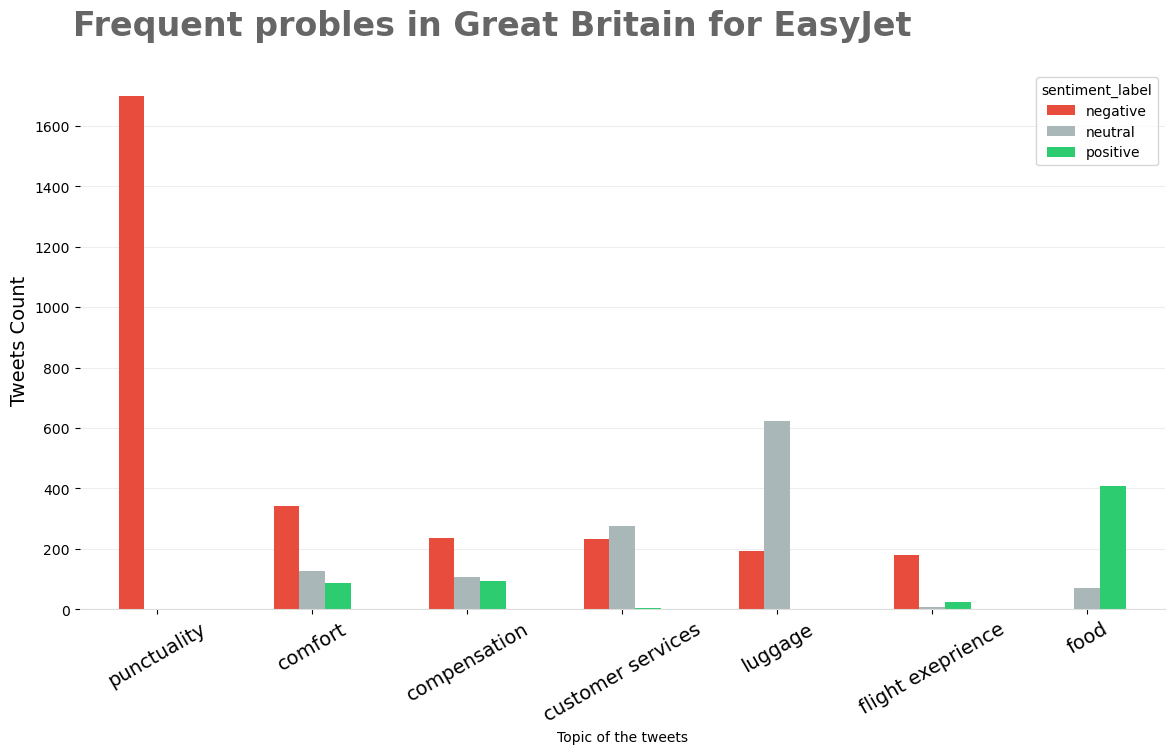

In [741]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

# plot
df_for_topics_easy_GB.plot(kind='bar', ax=ax, color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
ax.text(x=0.12, y=.93, s="Frequent probles in Great Britain for EasyJet", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# x axis 
ax.set_xlabel('Topic of the tweets')
plt.xticks(rotation=30, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

Text(0, 0.5, 'Tweets Count')

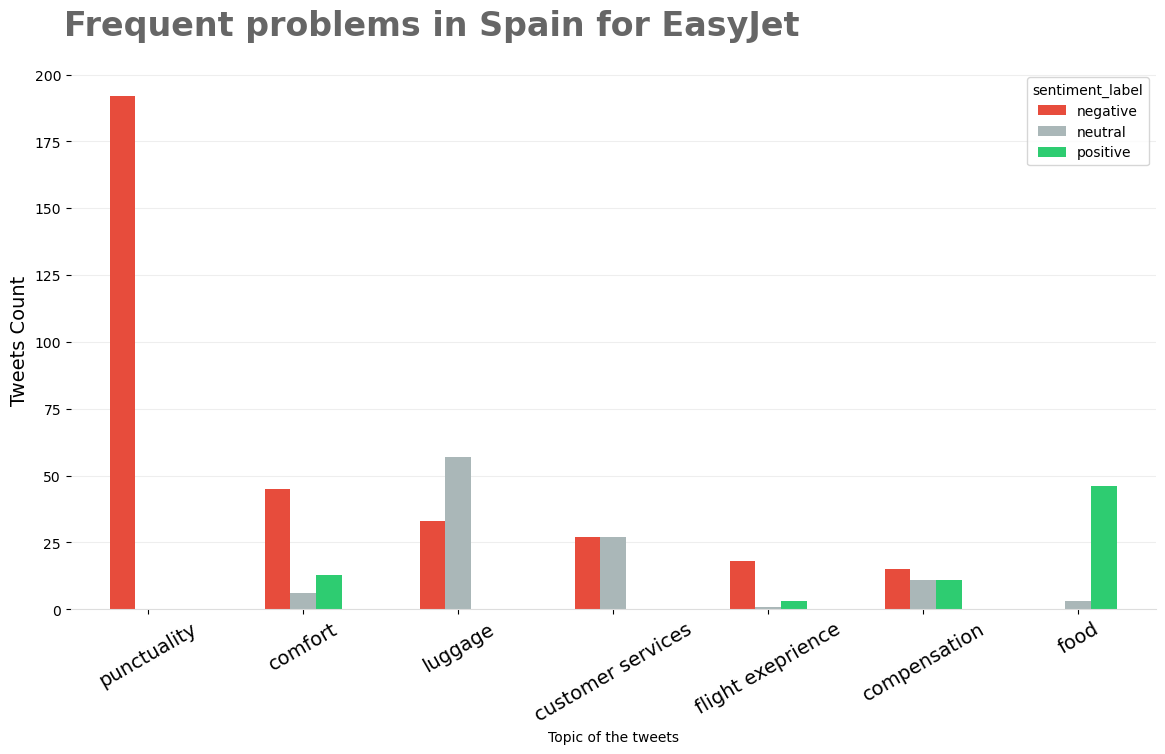

In [742]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

# plot
df_for_topics_easy_ES.plot(kind='bar', ax=ax, color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
ax.text(x=0.12, y=.93, s="Frequent problems in Spain for EasyJet", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# x axis 
ax.set_xlabel('Topic of the tweets')
plt.xticks(rotation=30, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

Text(0, 0.5, 'Tweets Count')

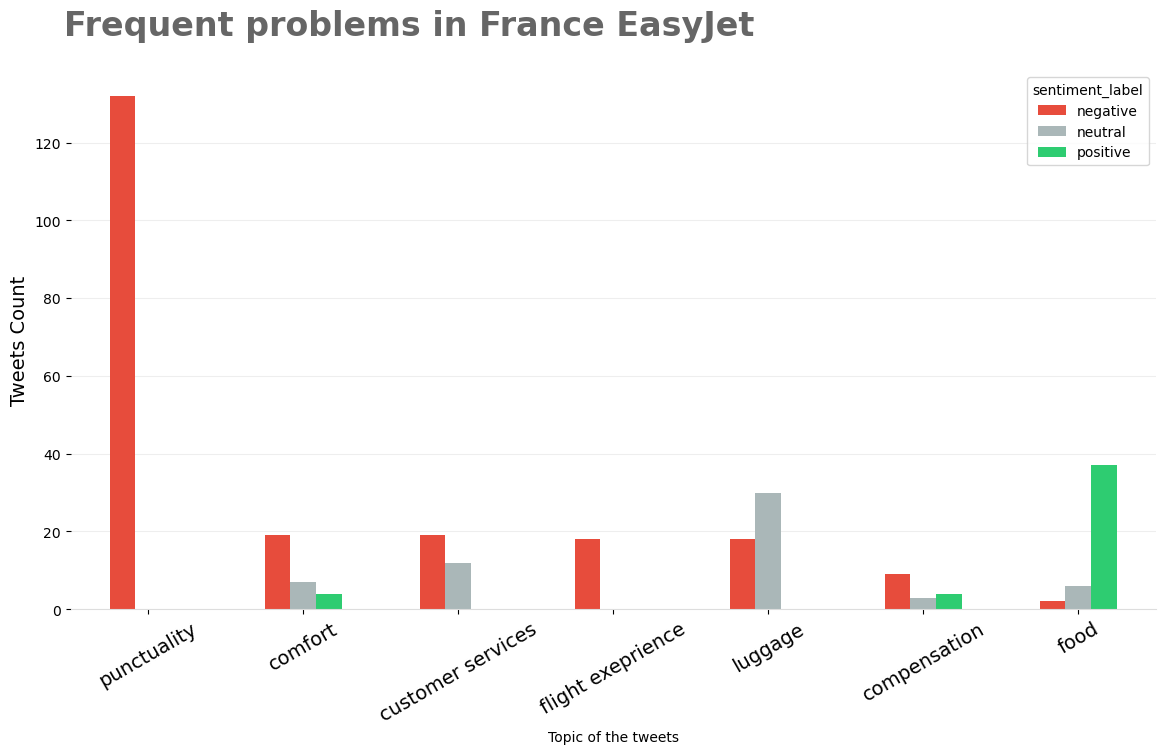

In [743]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

# plot
df_for_topics_easy_FR.plot(kind='bar', ax=ax, color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
ax.text(x=0.12, y=.93, s="Frequent problems in France EasyJet", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# x axis 
ax.set_xlabel('Topic of the tweets')
plt.xticks(rotation=30, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

Text(0, 0.5, 'Tweets Count')

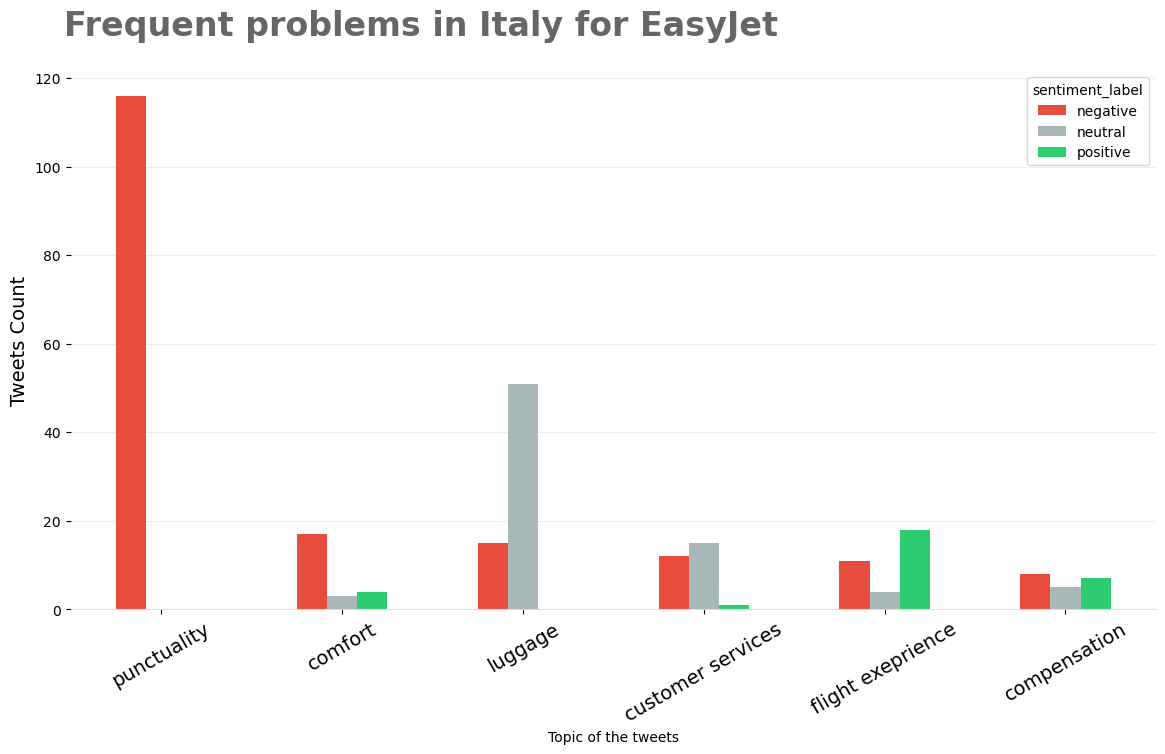

In [750]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

# plot
df_for_topics_easy_IT.plot(kind='bar', ax=ax, color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
ax.text(x=0.12, y=.93, s="Frequent problems in Italy for EasyJet", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# x axis 
ax.set_xlabel('Topic of the tweets')
plt.xticks(rotation=30, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

Text(0, 0.5, 'Tweets Count')

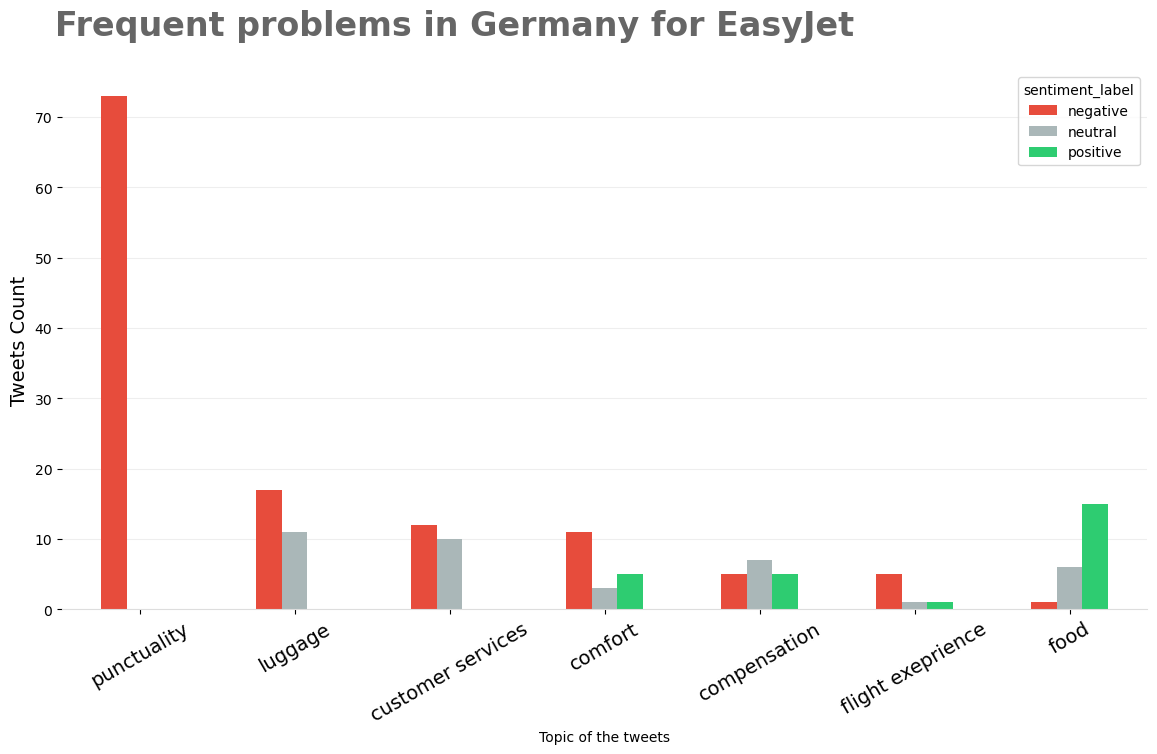

In [749]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

# plot
df_for_topics_easy_DE.plot(kind='bar', ax=ax, color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
ax.text(x=0.12, y=.93, s="Frequent problems in Germany for EasyJet", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# x axis 
ax.set_xlabel('Topic of the tweets')
plt.xticks(rotation=30, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

In [746]:
df_easy_jet_all = pd.concat([df_for_topics_easy_DE, df_for_topics_easy_ES, df_for_topics_easy_FR, df_for_topics_easy_GB, df_for_topics_easy_IT]).groupby(['topic']).sum().sort_values(by='negative', ascending=False)
df_british_jet_all = pd.concat([df_for_topics_british_DE, df_for_topics_british_ES, df_for_topics_british_FR, df_for_topics_british_GB, df_for_topics_british_IT]).groupby(['topic']).sum().sort_values(by='negative', ascending=False)

Text(0, 0.5, 'Number Of Tweets')

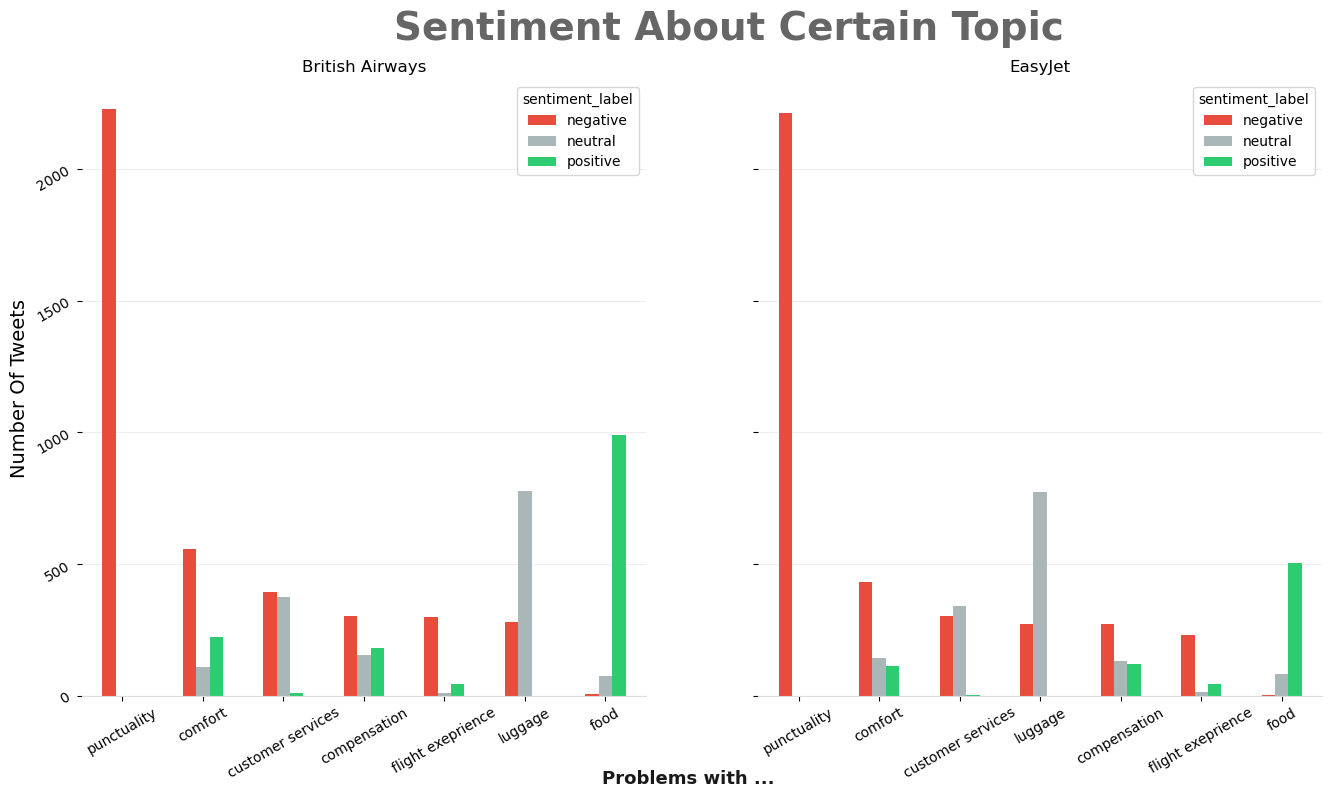

In [747]:
# initialize the figure for the plots 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8), sharey=True)

# plots
bars_grouped1 = df_british_jet_all.plot(kind='bar', ax=ax[0], color=['#E74C3C', '#AAB7B8', '#2ECC71'])
bars_grouped2 = df_easy_jet_all.plot(kind='bar', ax=ax[1], color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
fig.text(x=0.32, y=.93, s="Sentiment About Certain Topic", transform=fig.transFigure, ha='left', fontsize=28, weight='bold', alpha=.6)

fig.text(x=0.45, y=0, s="Problems with ...", transform=fig.transFigure, ha='left', fontsize=13, alpha=.9, weight='bold')

# set suptite
ax[0].set_title('British Airways')
ax[1].set_title('EasyJet')

# Axis formatting.
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_color('#DDDDDD')
ax[1].spines['bottom'].set_color('#DDDDDD')
ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[0].yaxis.grid(True, color='#EEEEEE')
ax[1].yaxis.grid(True, color='#EEEEEE')
ax[0].xaxis.grid(False)
ax[1].xaxis.grid(False)


# x axis 
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].tick_params(labelrotation=30)
ax[1].tick_params(labelrotation=30)

# y axis 
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_ylabel('Number Of Tweets', size=14)

# saving code
# fig.get_figure().savefig('sentiment_about_topics.png')

In [692]:
def from_Timestamp_to_datetime_str(Timestamp):
    """
    the input should be: Timestamp(any)
    returns date as string: 'year-mont-day'
    """

    date_time = Timestamp.to_pydatetime().strftime('%Y-%m-%d')

    return date_time


def from_Timestamp_to_timestamp_int(Timestamp):
    """
    The input should be: Timestamp(any)
    Returns timestamp integer
    """

    timestamp_int = int(Timestamp.timestamp())

    return timestamp_int


def from_datetime_str_to_timestamp_int(date_str: str):
    """
    The input should be: 'year-mont-day'
    Returns timestamp integer
    """

    date = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    timestamp_int = int(date.timestamp())

    return timestamp_int
